In [2]:
import csv
import numpy as np
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from shutil import copyfile
from PIL import Image
import xml.etree.ElementTree as ET
from keras.applications.densenet import DenseNet121, preprocess_input
from keras.utils import np_utils
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.utils import *
from keras.callbacks import *
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.io import imread
from random import sample
import warnings
warnings.filterwarnings('ignore')

In [167]:
original_images = os.path.join(os.getcwd(), 'archive/images/Images')
first = sample(os.listdir(original_images),4)
selected_images = []
for breed in first:
    path = original_images + "/" + breed
    breed_images = os.listdir(path)
    for breed_image in breed_images[:4]:
        selected_images.append(os.path.join(path, breed_image))

# Display original images of different breeds

In [168]:
def show_original_prictures(n_to_show):
    plt.figure(figsize=(16,16))
    for i, image in enumerate(selected_images):
        img = mpimg.imread(image)
        name = image.split("-")[1].split("/")[0]
        plt.subplot(n_to_show/4+1, 4, i+1).set_title('Picture of {}' .format(name))
        plt.imshow(img)
        plt.axis('off')

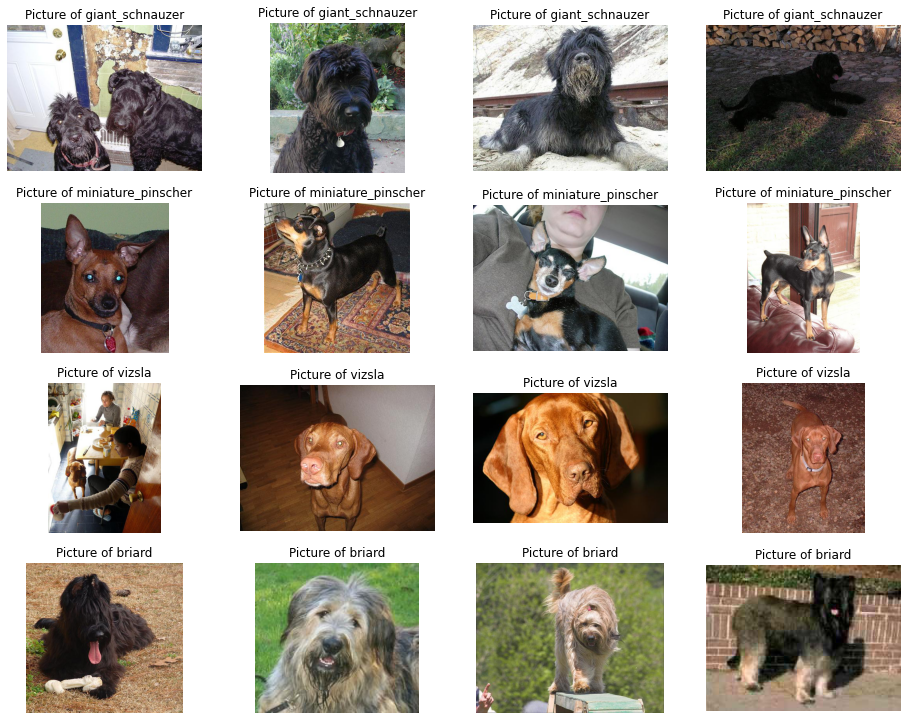

In [169]:
show_original_prictures(16)

# Display Cropped Images vs Original Images

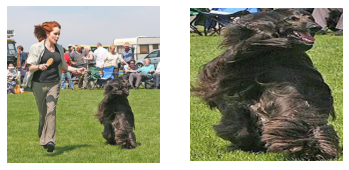

In [170]:
both_paths = ['archive/Images/images/n02088094-Afghan_hound/n02088094_93.jpg',
              'archive/croped_images/n02088094-Afghan_hound/n02088094_93.jpg']

for i, image in enumerate(both_paths):
    img = mpimg.imread(os.path.join(os.getcwd(), image))
    plt.subplot(1, 2, i+1)
    plt.imshow(img)
    plt.axis('off')

In [18]:
def import_arftifacts(path):
    
    import pickle
    keras_model = keras.models.load_model(os.path.join(path, "Dog_Breed_Classifier_New1.h5"))
    with open(os.path.join(path,'label_classes.pkl'), 'rb') as pickle_file:
        class_lables = pickle.load(pickle_file)
        rev_class_lables = {v:k for k, v in class_lables.items()}
    with open(os.path.join(path,'history_model.pkl'), 'rb') as pickle_file:
        history = pickle.load(pickle_file)
    return keras_model, rev_class_lables, history

keras_model, classes, history = import_arftifacts(path = os.path.join(os.getcwd(), "artifacts"))
    

In [24]:
def download_and_predict(url, filename):
    # download and save
    os.system("curl -s {} -o {}".format(url, filename))
    img = Image.open(filename)
    img = img.convert('RGB')
    img = img.resize((224, 224))
    img.save(filename)
    # show image
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis('off')
    # predict
    img = imread(filename)
    img = preprocess_input(img)
    probs = keras_model.predict(np.expand_dims(img, axis=0))
    y_classes = probs.argmax(axis=-1)
    for idx in probs.argsort()[0][::-1][:5]:
        print("{:.2f}%".format(probs[0][idx]*100), "\t", classes[idx].split("-")[-1])

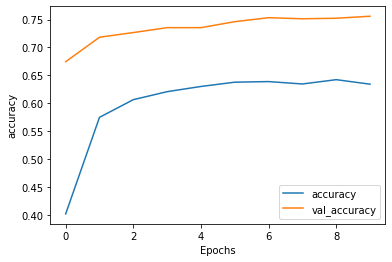

In [22]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history[string])
    plt.plot(history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')

# Correct Classifications

2021-10-25 12:31:46.951791: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-25 12:31:46.953266: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-10-25 12:31:47.274833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100.00% 	 Saint_Bernard
0.00% 	 Border_collie
0.00% 	 Bernese_mountain_dog
0.00% 	 Great_Pyrenees
0.00% 	 Greater_Swiss_Mountain_dog


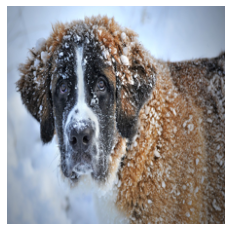

In [25]:
download_and_predict("https://cdn.pixabay.com/photo/2016/01/29/20/54/st-bernard-1168663_960_720.jpg",
                     "test_images/test_1.jpg")

83.25% 	 French_bulldog
14.20% 	 Boston_bull
2.50% 	 toy_terrier
0.03% 	 Chihuahua
0.02% 	 pug


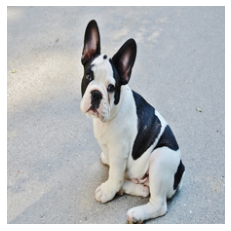

In [26]:
download_and_predict("https://cdn.pixabay.com/photo/2014/02/28/22/45/french-bulldog-277255_960_720.jpg",
                     "test_images/test_2.jpg")

77.76% 	 pug
22.14% 	 Pekinese
0.09% 	 Brabancon_griffon
0.00% 	 Shih_Tzu
0.00% 	 Norwegian_elkhound


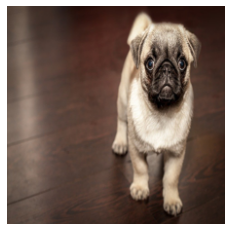

In [30]:
download_and_predict("https://cdn.pixabay.com/photo/2015/03/26/09/54/pug-690566_960_720.jpg",
                     "test_images/test_4.jpg")

# Incorrect Classifications

60.48% 	 Eskimo_dog
31.96% 	 malamute
7.10% 	 Siberian_husky
0.40% 	 collie
0.02% 	 Pembroke


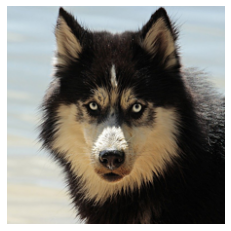

In [27]:
download_and_predict("https://cdn.pixabay.com/photo/2018/05/07/10/48/husky-3380548_960_720.jpg",
                     "test_images/test_3.jpg")